In [2]:
from STL.StlMl import STL_strategy
import Common.ApiClient as ac
import pandas as pd
import TradingStrategy as tStrategy
import numpy as np
from STL.StlMl import STL_strategy
Api_Key ='PKZRKMC8K5EDBXSVROBY'
Secret_Key='JZNLFV8N5gJLzwPMabzM8r6gPqH67uOhqCAOnKgL'
endpoint='https://paper-api.alpaca.markets'
client = ac.ApiClient(Api_Key,Secret_Key,endpoint)



C:\Users\lukas\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\lukas\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\lukas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
C:\Users\lukas\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float

Profit based on STL ML at last 5 months: 7.45%


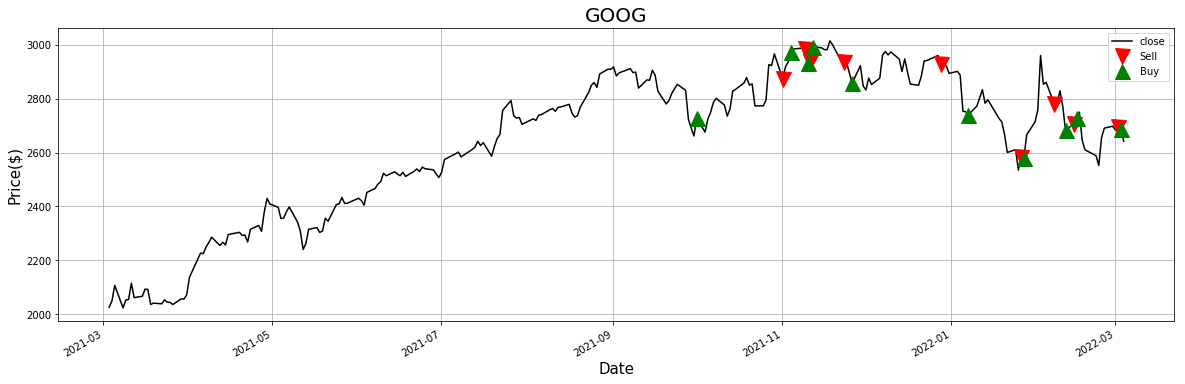

1
Profit based on STL ML at last 5 months: 5.40%


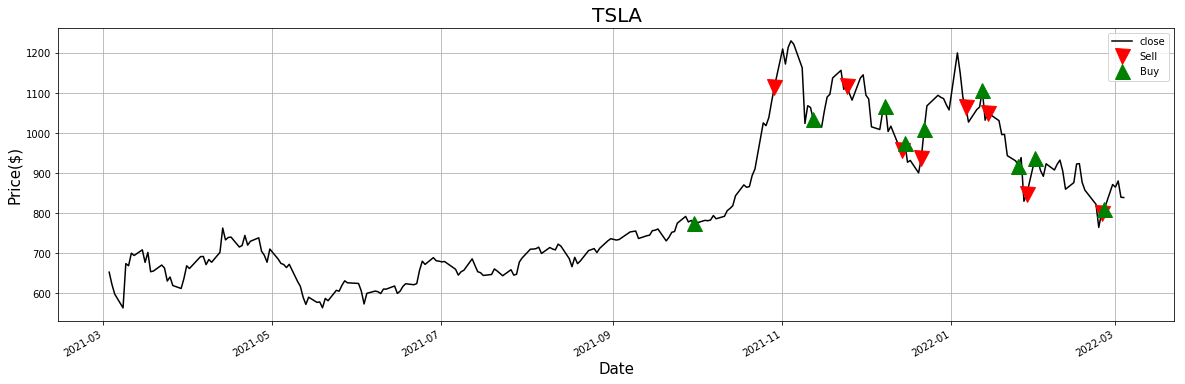

1
Profit based on STL ML at last 5 months: 12.78%


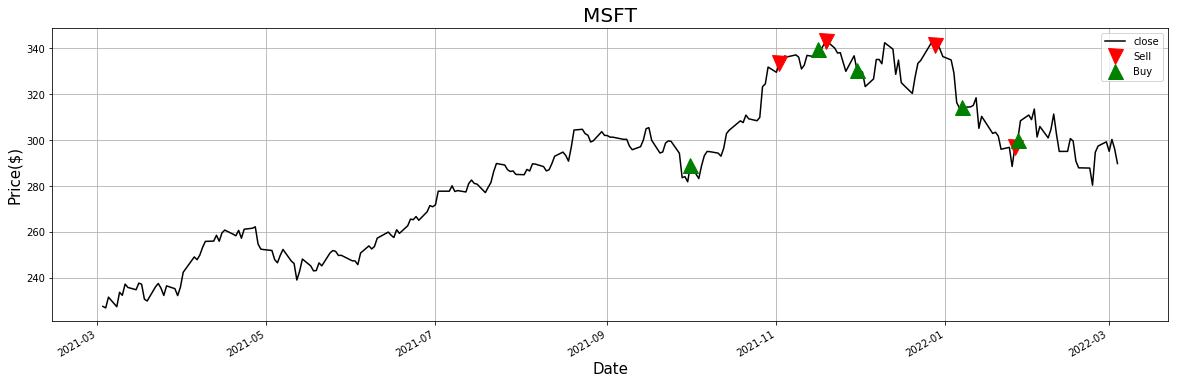

1
Profit based on STL ML at last 5 months: 15.73%


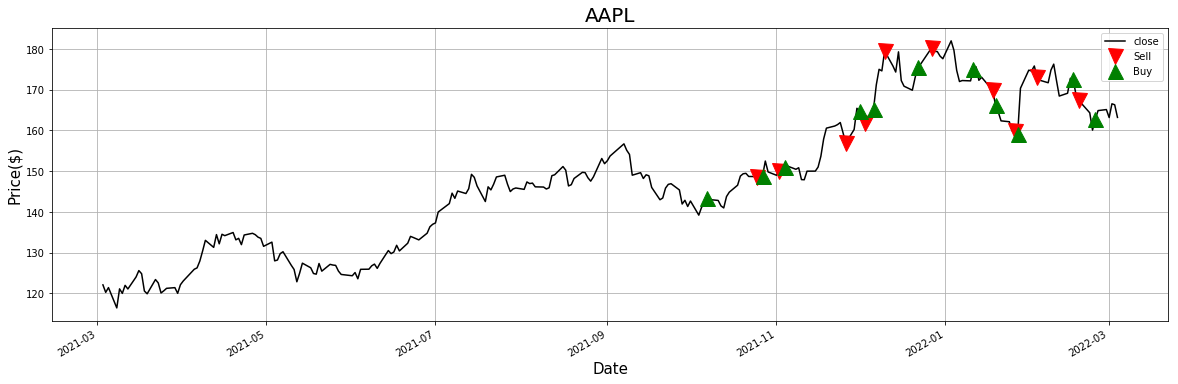

1
Profit based on STL ML at last 5 months: 21.64%


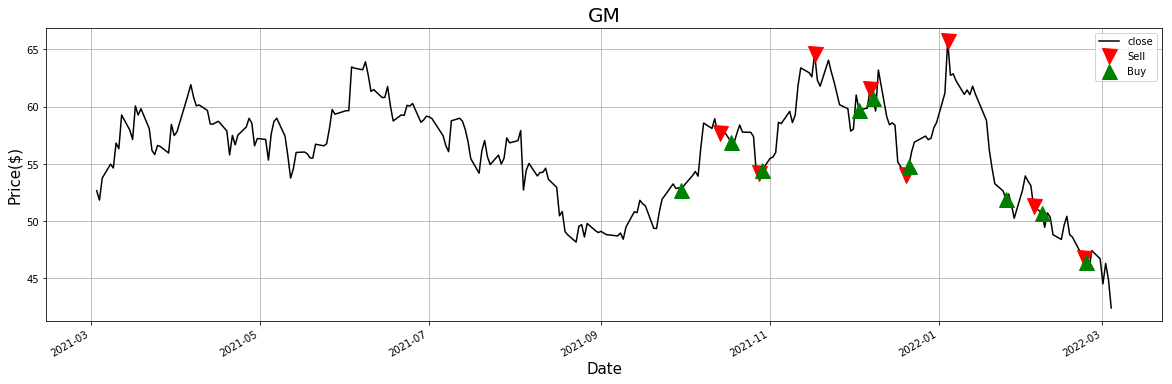

1
totl profit:62.99%


In [7]:
total = 0.0
from STL.StlMl import STL_strategy
for s,ticker in enumerate([ "GOOG","TSLA","MSFT","AAPL","GM"]):
    df= client.get_closing_price(ticker,255)
    #df = df.iloc[:-1]
    df.index=pd.to_datetime(df.index,utc=True)
    stl = STL_strategy(ticker,df,'close',20,2)  
    total += stl.backtest()
    print(stl.strategy())
print('totl profit:{:.2f}%'.format(total*100))

In [8]:
df

,open,high,low,close,volume
time,,,,,
2021-03-03 05:00:00+00:00,54.50,54.8800,52.6600,52.66,17681472
2021-03-04 05:00:00+00:00,52.99,54.1799,50.2500,51.84,23586882
2021-03-05 05:00:00+00:00,52.59,53.9900,50.4800,53.76,22849657
2021-03-08 05:00:00+00:00,54.29,56.2000,53.7400,54.98,23069780
2021-03-09 05:00:00+00:00,55.36,55.4300,54.0337,54.64,16875629
...,...,...,...,...,...
2022-02-28 05:00:00+00:00,46.27,47.1200,45.8400,46.71,14039552
2022-03-01 05:00:00+00:00,46.04,46.1597,44.1550,44.52,19082019
2022-03-02 05:00:00+00:00,44.79,46.6000,44.5600,46.31,16738937


In [9]:
model = 'stl'
STOCKs=["GOOG","TSLA","MSFT","AAPL","GM"]
Strategies={}
STOCKs_money = {}
for stock in STOCKs:
    Strategies[stock]=tStrategy.TradingStrategy(stock,Api_Key,Secret_Key,model)
    


if model.lower() == 'stl': 
    for stock,tradingStrategy in Strategies.items():
        # train and prediction
        df = tradingStrategy.get_past255_closing_prices()
        df.index=pd.to_datetime(df.index,utc=True)
        tradingStrategy.trained_model = "stl"
        stocks_predict = STL_strategy(stock,df,'close',20,2).strategy()
        print('stocks_predict',stock,stocks_predict)
        
        # Update current price and quantity
        tradingStrategy.get_positions_quantity()
        hold_count = tradingStrategy.EXISTING_QUANTITY         
        current_price = tradingStrategy.get_current_price()[0] 
        cash = float(tradingStrategy.client.get_account().buying_power) 
          
        #'''
        # Sell
        if hold_count!=0:
            loss = np.log(current_price/tradingStrategy.get_buy_price())           
            if stocks_predict ==-1 or loss <-0.06:
                print(stock,loss,hold_count)
                print("sell")
                #'''
                tradingStrategy.client.submit_order(stock,
                                    qty=hold_count,
                                    side="sell",
                                    type="market",
                                    time_in_force="day",
                                    order_class=None)
                #'''
        # Buy    
        elif stocks_predict == 1 and hold_count==0:
            count = 5
            for position in tradingStrategy.client.list_positions():    
                if position.symbol in STOCKs:
                    count -=1
            if count !=0 :    
                # detecting how many stocks is empty.
                # dvidie to get even cash for each 
                hold_count = int(np.floor((cash/count)/current_price))
                print(stock,hold_count)
                print("buy")
                #'''
                tradingStrategy.client.submit_order(stock,
                                    qty=hold_count,
                                    side="buy",
                                    type="market",
                                    time_in_force="day",
                                    order_class=None) 
                #'''
        #'''


stocks_predict GOOG 1
stocks_predict TSLA 1
stocks_predict MSFT 1
MSFT 145
buy
stocks_predict AAPL 1
stocks_predict GM 1
GM -0.08799359885427649 843
sell
